In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

1.Read datasets:Fake.csv and True.csv

In [ ]:
df_true = pd.read_csv("/content/True.csv")
df_fake = pd.read_csv("/content/Fake.csv")

In [ ]:
df_true.shape

(21417, 4)

In [ ]:
df_fake.shape

(23481, 4)

2.Data cleaning and preparation

In [ ]:
# Add flag to track real
df_true['target'] = 'true'

In [ ]:
df_true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [ ]:
# Add flag to track fake
df_fake['target'] = 'fake'

In [ ]:
df_fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [ ]:
# Concatenate dataframes
df_news = pd.concat([df_true, df_fake]).reset_index(drop = True)

In [ ]:
df_news.shape

(44898, 5)

In [ ]:
df_news.head(5)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [ ]:
df_news.tail(5)

,title,text,subject,date,target
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",fake


In [ ]:
# Shuffle the data
from sklearn.utils import shuffle
df_news=shuffle(df_news)
df_news = df_news.reset_index(drop=True)

In [ ]:
df_news.head()

,title,text,subject,date,target
0,HILLARY CLINTON’S Super Detailed Counterterror...,And the left says Trump hasn t given details a...,politics,"Jun 14, 2016",fake
1,Watch Trump’s Campaign Manager Crash And Burn...,"Defending Donald Trump is no easy task, but ev...",News,"September 26, 2016",fake
2,Connecticut lawmakers pass $41.3 billion budge...,NEW YORK (Reuters) - Connecticut lawmakers on ...,politicsNews,"October 26, 2017",true
3,AWESOME! ATTORNEY GENERAL JEFF SESSIONS Just D...,#FlashbackFriday 1993 #AttorneyGate Clinton AG...,politics,"Mar 10, 2017",fake
4,"Sarah Palin’s Idiocy Strikes Again, Urges Us ...",In what some may assume is a misspeak and othe...,News,"April 5, 2016",fake


In [ ]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [ ]:
# Removing the title
df_news.drop(["title"],axis=1,inplace=True)

In [ ]:
df_news.head()

,text,subject,date,target
0,And the left says Trump hasn t given details a...,politics,"Jun 14, 2016",fake
1,"Defending Donald Trump is no easy task, but ev...",News,"September 26, 2016",fake
2,NEW YORK (Reuters) - Connecticut lawmakers on ...,politicsNews,"October 26, 2017",true
3,#FlashbackFriday 1993 #AttorneyGate Clinton AG...,politics,"Mar 10, 2017",fake
4,In what some may assume is a misspeak and othe...,News,"April 5, 2016",fake


In [ ]:
# Removing the date
df_news.drop(["date"],axis=1,inplace=True)

In [ ]:
df_news.head()

,text,subject,target
0,And the left says Trump hasn t given details a...,politics,fake
1,"Defending Donald Trump is no easy task, but ev...",News,fake
2,NEW YORK (Reuters) - Connecticut lawmakers on ...,politicsNews,true
3,#FlashbackFriday 1993 #AttorneyGate Clinton AG...,politics,fake
4,In what some may assume is a misspeak and othe...,News,fake


In [ ]:
# Convert to lowercase
df_news['text'] = df_news['text'].apply(lambda x: x.lower())

In [ ]:
df_news.head()

,text,subject,target
0,and the left says trump hasn t given details a...,politics,fake
1,"defending donald trump is no easy task, but ev...",News,fake
2,new york (reuters) - connecticut lawmakers on ...,politicsNews,true
3,#flashbackfriday 1993 #attorneygate clinton ag...,politics,fake
4,in what some may assume is a misspeak and othe...,News,fake


In [ ]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_news['text'] = df_news['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_news.head()

,text,subject,target
0,left says trump given details president? hilla...,politics,fake
1,"defending donald trump easy task, even promine...",News,fake
2,new york (reuters) - connecticut lawmakers thu...,politicsNews,true
3,#flashbackfriday 1993 #attorneygate clinton ag...,politics,fake
4,may assume misspeak others may attribute freud...,News,fake


In [ ]:
# Remove punctuation
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
df_news['text'] = df_news['text'].apply(punctuation_removal)

In [ ]:
df_news.head()

,text,subject,target
0,left says trump given details president hillar...,politics,fake
1,defending donald trump easy task even prominen...,News,fake
2,new york reuters connecticut lawmakers thursd...,politicsNews,true
3,flashbackfriday 1993 attorneygate clinton ag r...,politics,fake
4,may assume misspeak others may attribute freud...,News,fake


3.Data exploration

fake    23481
true    21417
Name: target, dtype: int64


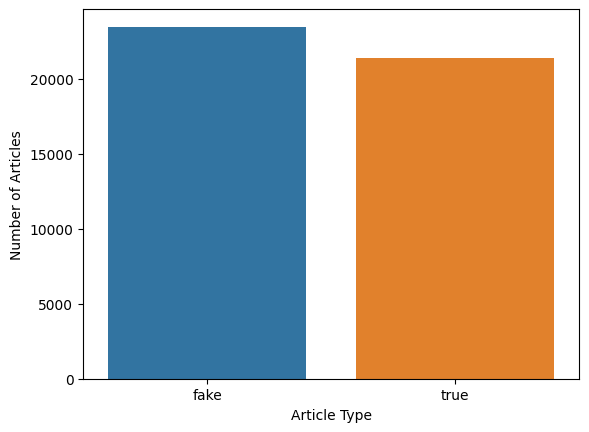

In [ ]:
# How many fake and real articles?
article_counts = df_news['target'].value_counts()
print(article_counts)
# Plotting
sns.barplot(x=article_counts.index, y=article_counts.values)
plt.xlabel('Article Type')  # Modification de l'étiquette de l'axe x
plt.ylabel('Number of Articles')
plt.show()

On observe que« Fake news » contiennent plus de articles que les « True news ». Cela est probablement dû aux efforts des auteurs de « Fake news » pour donner l’impression que leurs articles sont vrais .

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64


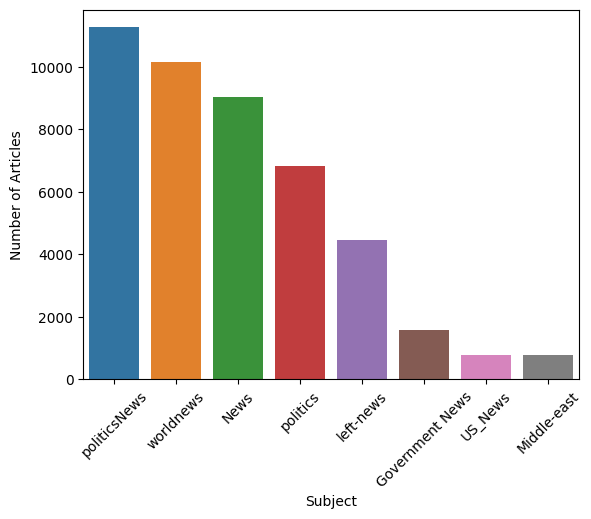

In [ ]:
# How many articles per subject?
subject_counts = df_news['subject'].value_counts()
print(subject_counts)
# Plotting
sns.barplot(x=subject_counts.index, y=subject_counts.values)
plt.xlabel('Subject')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.show()

"On observe que le nombre de sujets d'articles est de huit. De plus, le nombre d'articles sur le sujet 'politicsNews' est élevé par rapport aux autres sujets. En revanche, le sujet 'Middle-east' contient moins d'articles."

In [ ]:
 pip install wordcloud

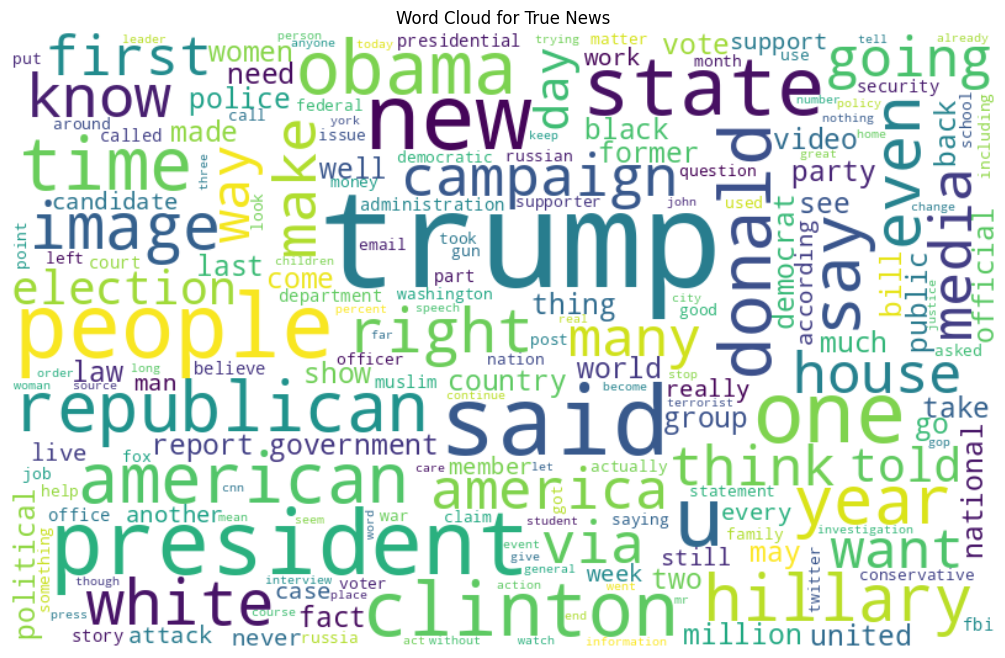

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

# Sélection des données pour les vraies nouvelles
true_data = df_news[df_news["target"] == "fake"]

# Concaténation de tous les textes des vraies nouvelles
all_true_words = ' '.join(true_data['text'])

# Création du nuage de mots
wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False, background_color='white').generate(all_true_words)

# Affichage du nuage de mots
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for True News')
plt.show()


"Parmi les mots les plus utilisés dans les articles de "True news", on a : people,clinton,president,clinton,year,..."

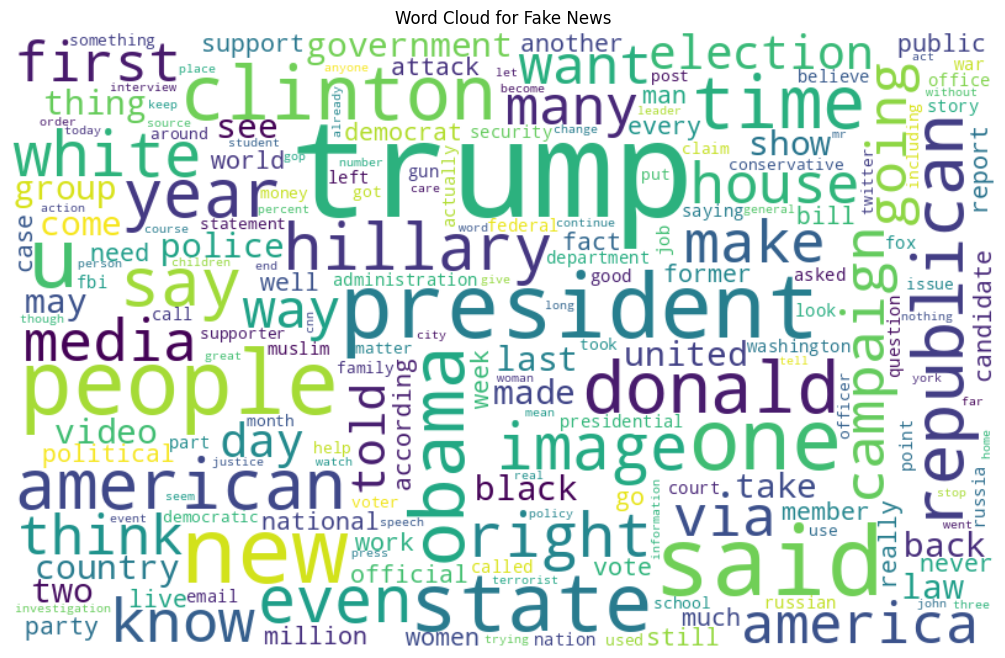

In [ ]:
# Word cloud for fake news
from wordcloud import WordCloud

# Sélection des données pour les fausses nouvelles
fake_data = df_news[df_news["target"] == "fake"]

# Concaténation de tous les textes des fausses nouvelles
all_fake_words = ' '.join(fake_data['text'])

# Création du nuage de mots
wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False, background_color='white').generate(all_fake_words)

# Affichage du nuage de mots
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Fake News')
plt.show()


"Parmi les mots les plus utilisés dans les articles de "Fake news", on a : people,american,new,state,donald,..."

In [ ]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity, bar_color='blue'):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns="Frequency", n=quantity)
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df_frequency, x="Word", y="Frequency", color=bar_color)
    ax.set(ylabel="Count")
    plt.xticks(rotation='vertical')
    plt.show()


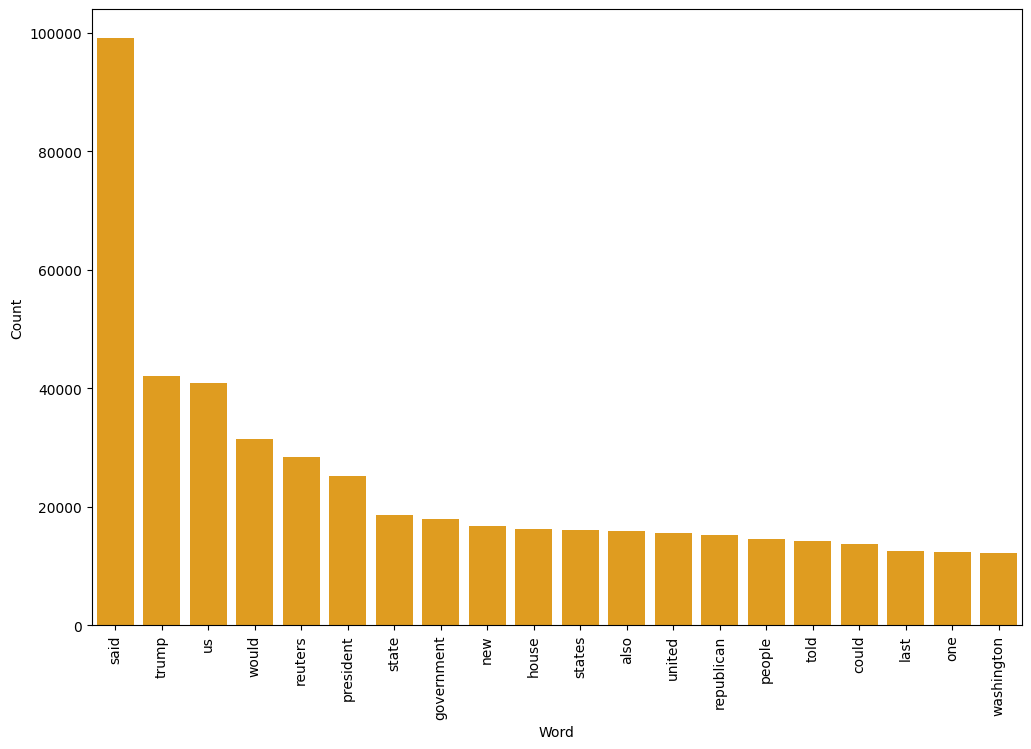

In [ ]:
# Most frequent words in true news
counter(df_news[df_news["target"] == "true"], "text", 20,bar_color='orange')

"On observe que le mot 'said' est beaucoup utilisé dans les articles de 'True news' par rapport aux autres mots. En revanche, le mot 'washington' est utilisé moins."

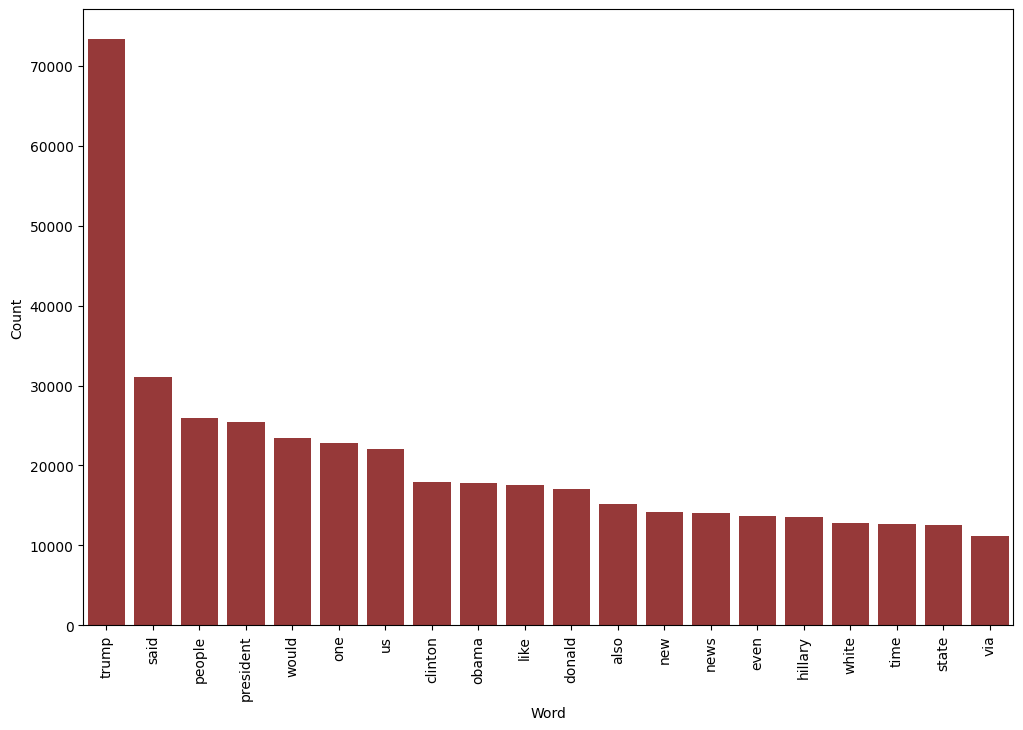

In [ ]:
# Most frequent words in fake news
counter(df_news[df_news["target"] == "fake"], "text", 20,bar_color='brown')

"On observe que le mot 'trump' est beaucoup utilisé dans les articles de 'Fake news' par rapport aux autres mots. En revanche, le mot 'via' est utilisé moins."

4.Modeling

In [ ]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(df_news['text'], df_news.target, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

36335    first time lives entering era elected presiden...
12384    washington reuters  michael flynn advisers don...
24419    21st century wire says george soros described ...
24740    political correctness literally killing americ...
27039    democrats stop nothing win election fight hard...
Name: text, dtype: object

In [ ]:
y_train.head()

36335    fake
12384    true
24419    fake
24740    fake
27039    fake
Name: target, dtype: object

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Vectorizing and applying TF-IDF
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', DecisionTreeClassifier(criterion='entropy', max_depth=20, splitter='best', random_state=42))
])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 99.45%


Confusion matrix, without normalization


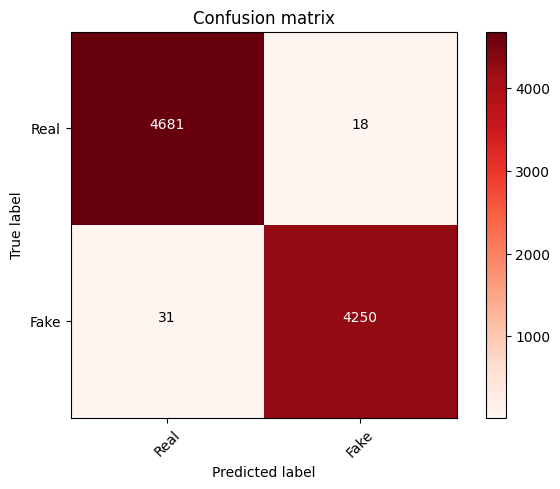

In [ ]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, prediction)

# Plot Confusion Matrix with red color
plot_confusion_matrix(cm, classes=['Real', 'Fake'], cmap='Reds')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4699
        true       0.99      0.99      0.99      4281

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Logistic Regression

Accuracy: 98.83%
Confusion matrix, without normalization


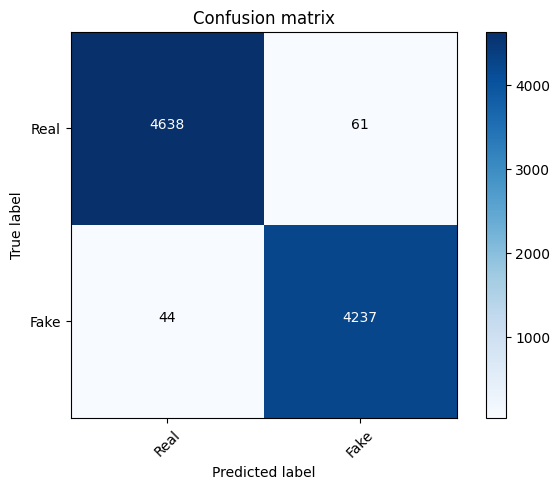

In [ ]:
from sklearn.linear_model import LogisticRegression
# Vectorizing and applying TF-IDF
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', LogisticRegression(random_state=42))
])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy*100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, prediction)

# Plot Confusion Matrix
plot_confusion_matrix(cm, classes=['Real', 'Fake'])
